In [20]:
# get x = [...], y = [...]

f = open(r'K:\TAI LIEU TAM THOI\\dt.txt','r')
f = f.readlines()
x = []
y = []
for k in f:
    k = [float(x.strip()) for x in k.strip().split(' ')]
    x.append(k[0])
    y.append(k[1])

In [21]:
# approximate linear line:

M = sum([2*(k**2) for k in x])
N = 2*sum(x)
V = sum([ 2*x[k]*y[k] for k in range(len(x)) ])
P = sum(x)
Q = sum(y)

a_hat = (V - Q*N)/(M - P*N)
b_hat = Q - a_hat * P

linear_approximation_line = 'y='+str(a_hat)+'*x+'+str(b_hat)
print(linear_approximation_line)

# a_hat * M + b_hat * N = V
# a_hat * P + b_hat = Q
# a_hat * P*N + b_hat * N = Q*N
# a_hat = (V - Q*N)/(M - P*N)
# b_hat = Q - a_hat * P

y=0.20892556311220836*x+-11.409595775863693


In [30]:
#--------- DÙNG THƯ VIỆN SKLEARN ----------


# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing


fo = r'K:\LEARN AI FPT\TERM 3\AI - DS with Python - SQL\Datasets\\'
import pandas as pd
# importing data
df = pd.read_csv(fo+'Real-estate1.csv')
df.drop('No', inplace = True,axis=1)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

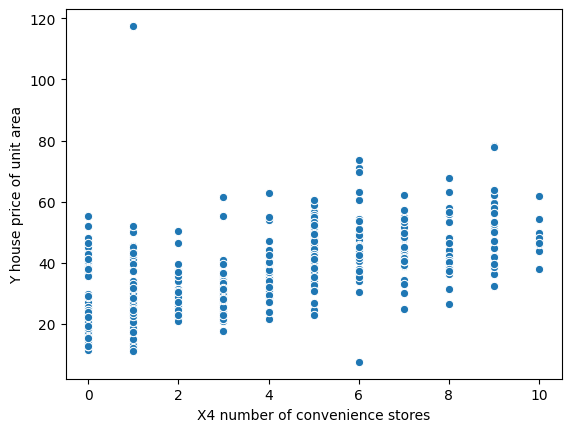

In [31]:
# plotting a scatterplot
sns.scatterplot(x='X4 number of convenience stores',y='Y house price of unit area', data=df)

In [57]:
# creating feature variables
X = df.drop('Y house price of unit area',axis= 1)
y = df['Y house price of unit area']
for c in df:
    print(c)

X1 transaction date
X2 house age
X3 distance to the nearest MRT station
X4 number of convenience stores
X5 latitude
X6 longitude
Y house price of unit area


In [36]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
# creating a regression model
model = LinearRegression()

In [38]:
# fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [49]:
# making predictions
predictions = model.predict(X_test)

In [50]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  46.211797834935304
mean_absolute_error :  5.392293684756367


In [76]:
# TEST MODEL WITH NEW_DATA:

cols = []
for c in df:
    cols.append(c)
cols = cols[:-1]
#val1 = '2012.917 32.0 84.87882 10 24.98298 121.54024'
val = '2013.000 13.7 4082.01500 0 24.94155 121.50381'
val = val.strip().split(' ')
dic = [(cols[k],val[k]) for k in range(len(cols))]
new_data = {}
for k in range(len(val)):
    new_data[cols[k]] = val[k]
print(new_data)

# test model with new_data:
new_data = pd.Series(new_data).values.reshape(1,-1)
model.predict(new_data)

{'X1 transaction date': '2013.000', 'X2 house age': '13.7', 'X3 distance to the nearest MRT station': '4082.01500', 'X4 number of convenience stores': '0', 'X5 latitude': '24.94155', 'X6 longitude': '121.50381'}


C:\Users\Thanh Tran\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.03994906])

In [56]:
model.predict(X_test)

array([12.63830383, 10.0304461 , 22.98807375, 48.50264837, 32.67140451,
       37.82572669, 36.09178068, 41.05953639, 47.84830793, 40.4574746 ,
       45.0361603 , 32.86533457, 40.48623576, 36.48827849, 44.30595729,
       46.59668235, 38.42798244, 44.26307337, 48.81959723, 45.50409246,
       42.23260833, 54.6526397 , 48.07373298, 37.48194231, 33.57091525,
       48.26293154, 40.23479801, 50.42675437, 47.22333423, 38.99458517,
       48.11033139, 40.47035604, 45.61060308, 43.98441528, 46.54336092,
        8.18725886, 38.08375879, 39.82608171,  8.5339677 , 55.72740213,
       32.17950939, 49.72698264, 24.85604948, 47.64473233, 41.23026871,
       51.17703175, 42.04716292, 37.32689765, 44.24427856, 36.27028988,
       47.55408451, 34.74054504, 43.53329366, 15.95586215, 38.29001222,
       48.93912385, 44.69790471, 44.91934627, 45.33972278, 41.33035787,
       34.39899173, 44.02303164, 41.99940522, 43.9553153 , 53.61420366,
       44.24994361, 24.68926603, 47.06140631, 31.22031534, 40.49